
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 3 <br>
</div>


---



### Full Name : Raya Namazi
### Student Number : 402100561
___

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/DIP/Hw3-practical

/content/drive/MyDrive/DIP/Hw3-practical


First, read the image:

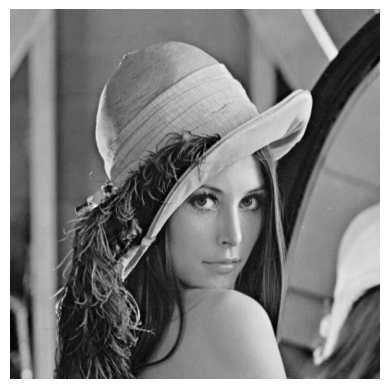

In [4]:
gray = cv2.imread("lena.png", 0)
plt.axis('off')
plt.imshow(gray, cmap="gray")

Complete the sp function below to add random salt and pepper noise to the image with rate n. generate noisy images with rates 0.1, 0.2, 0.3, ... ,1.

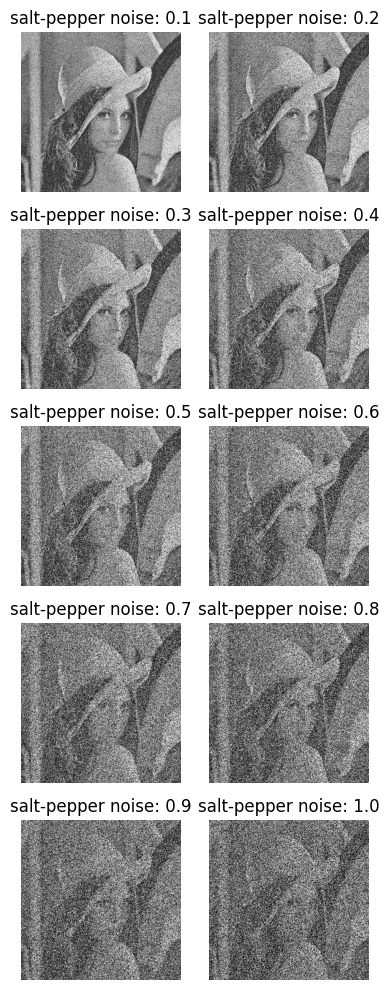

In [6]:
def sp(pic, n):

    noise_img = np.copy(pic)

    total_pixels = pic.size
    num_salt = int(np.ceil(n * total_pixels * 0.5))
    num_pepper = int(np.ceil(n * total_pixels * 0.5))

    coords = [np.random.randint(0, i, num_salt) for i in pic.shape]
    noise_img[coords[0], coords[1]] = 255

    coords = [np.random.randint(0, i, num_pepper) for i in pic.shape]
    noise_img[coords[0], coords[1]] = 0

    return noise_img

image_path = 'lena.png'
gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


a = []
for i in range(1, 11):
    a.append(sp(gray, 0.1 * i))

fig, axes = plt.subplots(5, 2, figsize=(4, 10))
axes = axes.flatten()

for idx, (ax, img) in enumerate(zip(axes, a)):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"salt-pepper noise: {np.round((idx + 1) * 0.1, 2)}")
    ax.axis('off')

plt.tight_layout()
plt.savefig('sp_noise_comparison.png')
plt.show()

for i, img in enumerate(a):
    cv2.imwrite(f'noisy_image_rate_{np.round(0.1 * (i + 1), 2)}.jpg', img)

Implement a function that takes a noisy image as input and applies a mean filter of size kernel_size * kernel_size on it. Use numpy only.



In [7]:
def apply_mean_filter(image, kernel_size):


    height, width = image.shape

    pad_size = (kernel_size - 1) // 2

    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    filtered_image = np.zeros_like(image, dtype=np.float32)

    for i in range(height):
        for j in range(width):
            window = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.mean(window)

    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

    return filtered_image

In [8]:
def display_results(noisy_image, method_function, filter_name):
    pics = [noisy_image]
    titles = ["Original noisy image"]
    kernel_sizes = [3, 5, 7]
    for i, k in enumerate(kernel_sizes):
        filtered_image = method_function(a[0], k)
        pics.append(filtered_image)
        titles.append(f"{filter_name} filter with kernel size {k}")

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()

    for idx, (ax, img) in enumerate(zip(axes, pics)):
        ax.imshow(img, cmap='gray')
        ax.set_title(titles[idx])
        ax.axis('off')

    plt.tight_layout()
    plt.show()


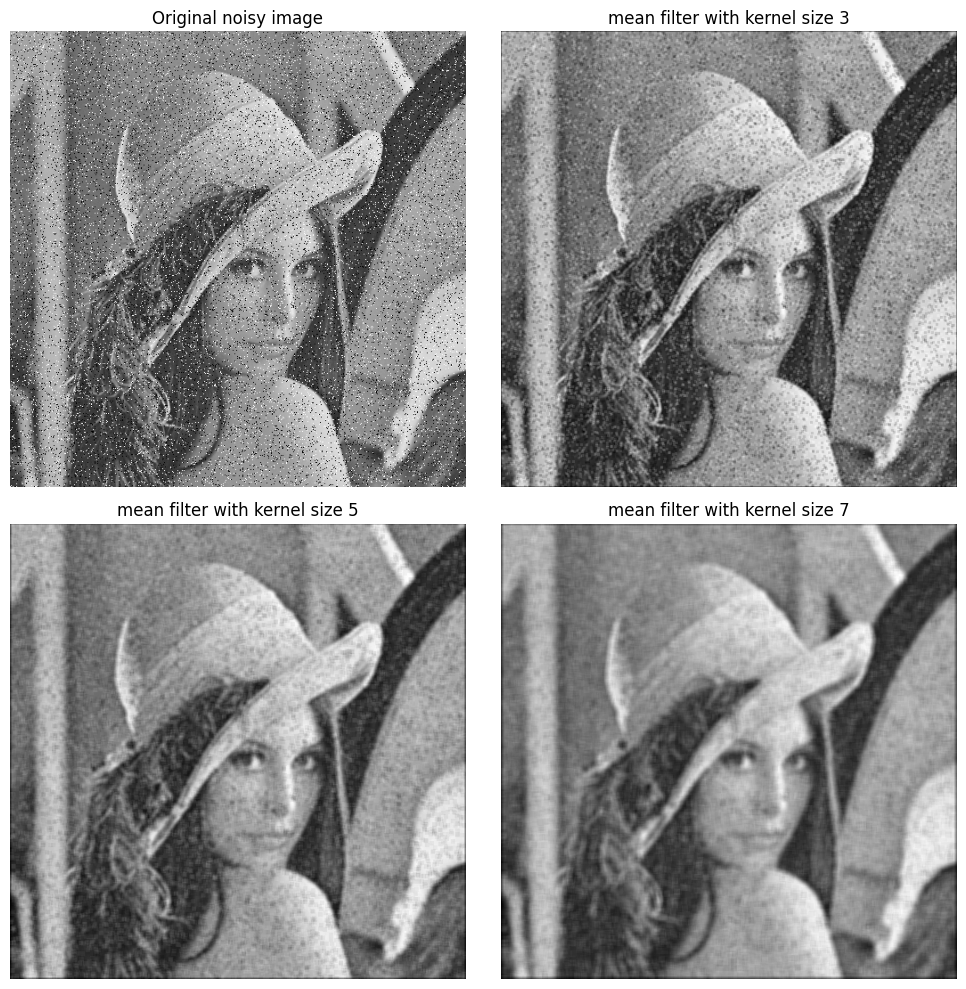

In [9]:
display_results(a[0], apply_mean_filter, filter_name="mean")

###Theory Question:
Explain the reason behind the differences between the outputs of a 3✕3, 5✕5, and 7✕7 mean filter.

###Your Answer:
Larger kernels produce smoother images by averaging more pixels, which dilutes the effect of outliers (like salt and pepper noise) but sacrifices detail. Smaller kernels retain more details but are less effective at noise suppression.

Smaller kernels (3×3) are better at preserving edges and fine details, while larger kernels (7×7) cause more loss of structural information, which may be undesirable for images where edges are important


Use cv2's built-in function(s) to do the same as the mean filter you implemented above.



In [10]:
def builtin_mean_filter(image, kernel_size):

    filtered_image = cv2.blur(image, (kernel_size, kernel_size))

    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

    return filtered_image

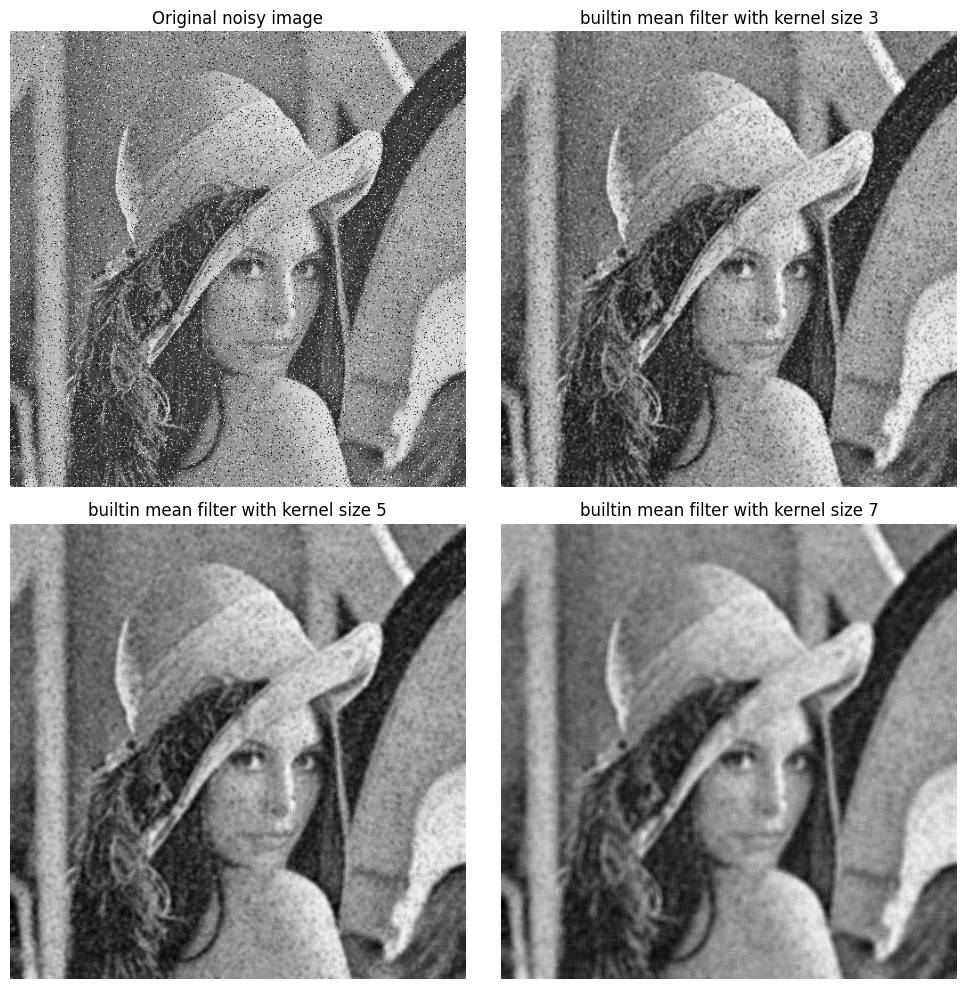

In [11]:
display_results(a[0], builtin_mean_filter, filter_name="builtin mean")

Implement a function that takes a noisy image as input and applies a median filter of size kernel_size * kernel_size on it. Use numpy only.

In [12]:
def apply_median_filter(image, kernel_size):

    height, width = image.shape

    pad_size = (kernel_size - 1) // 2

    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    filtered_image = np.zeros_like(image, dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            window = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.median(window)

    return filtered_image

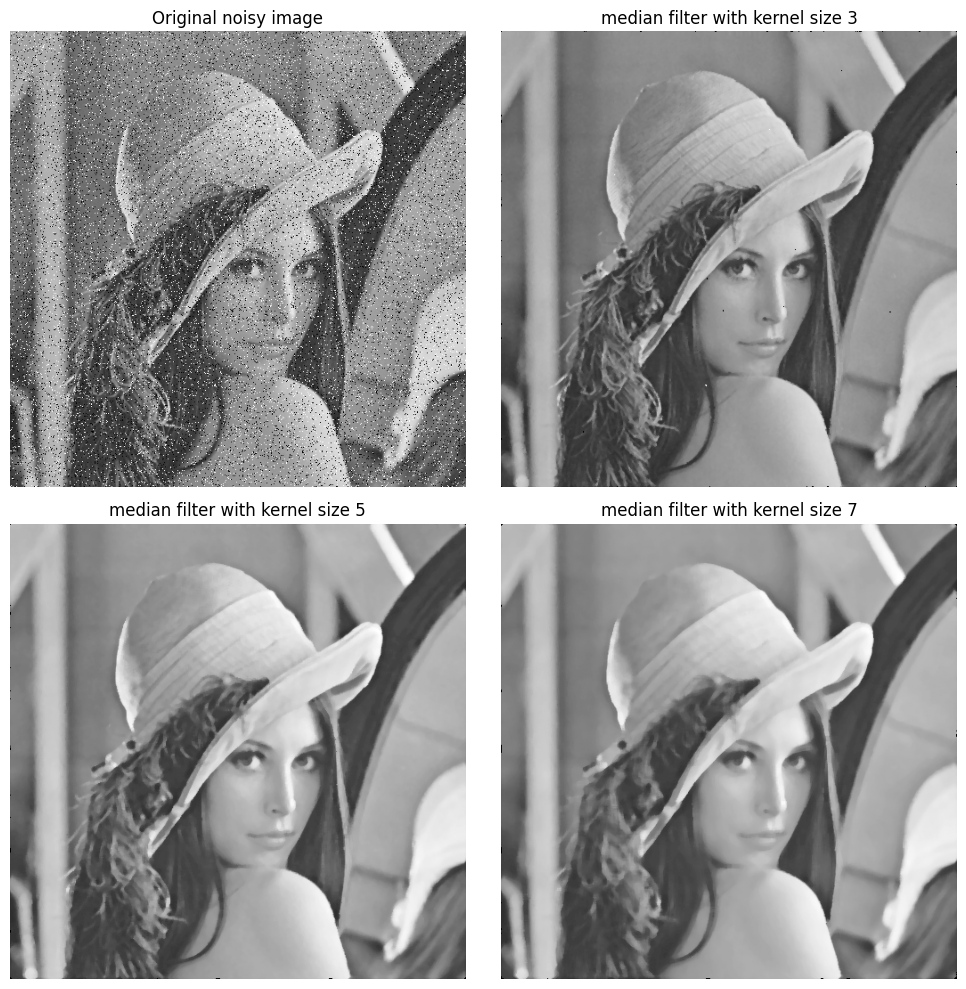

In [13]:
display_results(a[0], apply_median_filter, filter_name="median")

###Theory Question:
Explain the reason behind the differences between the outputs of a 3✕3, 5✕5, and 7✕7 median filter.

###Your Answer:
Larger kernels (7×7) are more robust at removing salt and pepper noise because they consider more pixels, increasing the likelihood that the median is a non-noisy value. However, they process larger areas, which may affect fine details.

Larger kernels (7×7) are better at eliminating salt and pepper noise, especially at higher noise rates, because they can tolerate more outliers. Smaller kernels (3×3) are less effective in dense noise scenarios but sufficient for lower noise rates.

Smaller kernels (3×3) excel at preserving edges and fine details, making them ideal for images with low noise or where detail is critical. Larger kernels (7×7) may slightly blur fine details or thin edges.

Use cv2's built-in function(s) to do the same as the median filter you implemented above.

In [14]:
def builtin_median_filter(image, kernel_size):

    filtered_image = cv2.medianBlur(image, kernel_size)

    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

    return filtered_image

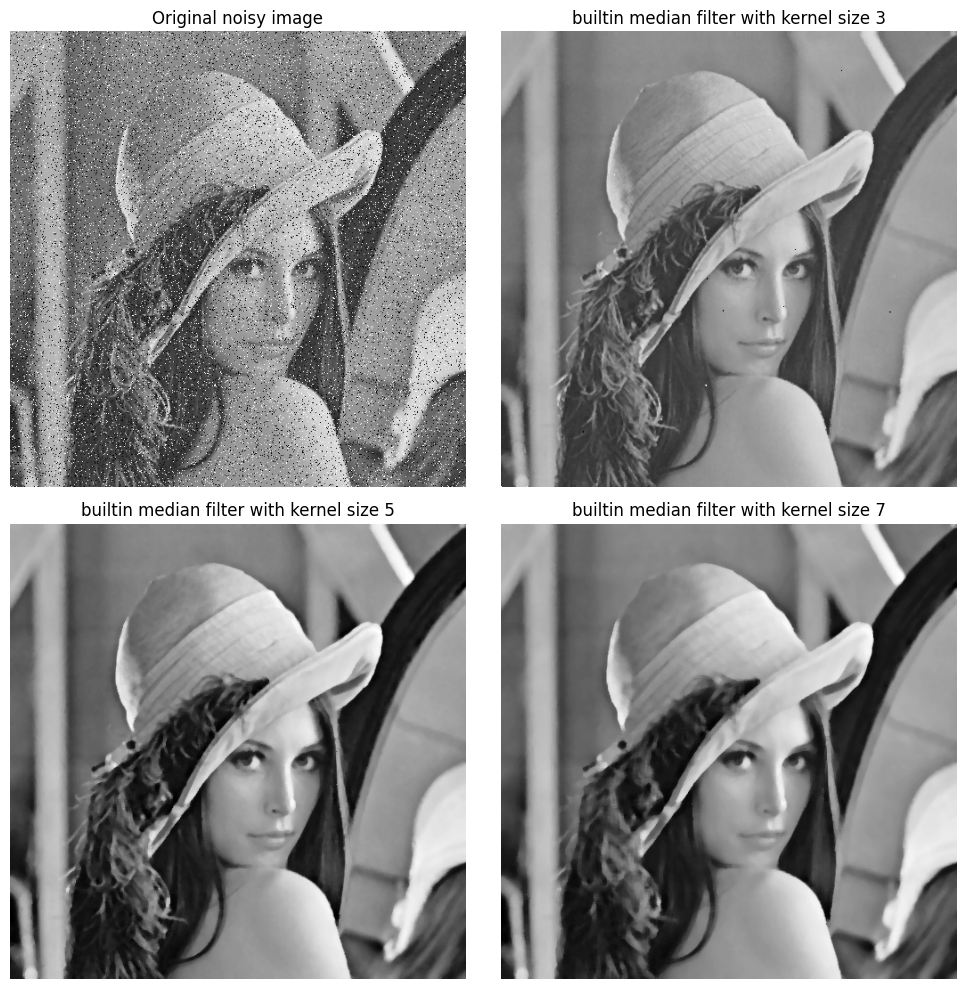

In [15]:
display_results(a[0], builtin_median_filter, filter_name="builtin median")

###Theory Question:
Explain the reason behind the differences between the outputs of a mean and median filter of the same size. Which one performs better on the task of removing salt and pepper noise? why?

###Your Answer:
Mean filter computes the average of pixel intensities in the kernel_size x kernel_size neighborhood.This blends all pixel values, including any noisy ones, into the output, so the output pixel is a weighted combination of all neighboring pixels, which smooths the image but can introduce new intensity values not present in the original image.

Median filter sorts the pixel intensities in the kernel and selects the middle value, so the output pixel is an existing value from the neighborhood, which avoids blending and preserves the original intensity distribution better.

Mean filter includes all pixel values in the average, so noisy pixels significantly affect the output, but median filter discards extreme values by selecting the median, therefor it effectively removes noisy pixels, replacing them with a value from the surrounding non-noisy pixels and makes a cleaneer image.

Mean filter averages pixel values across the kernel, which blurs edges, but median filter selects an existing pixel value, typically from the dominant intensity region in the kernel, preserving edges better.

Salt and pepper noise consists of random, extreme-valued pixels, which are outliers in the intensity distribution. The median filter is designed to handle such outlier, because it discards extreme values, replacing noisy pixels with a non-noisy value from the neighborhood and by selecting an existing pixel value, the median filter avoids blending intensities, maintaining sharp edges and fine details.